In [335]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from mlxtend.plotting.decision_regions import plot_decision_regions
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from scipy.optimize import minimize_scalar

In [337]:
def constraint(mu, y):
    return np.mean(mu * y)

In [339]:
def dual(mu, X, y):
    N = len(mu)
    s = np.sum(mu[:, None] * y[:, None] * X, axis=0)
    return -(np.sum(mu) - 0.5 * (np.sum(s * s))) / N

In [340]:
def projection(y):
    return np.identity(len(y)) - y.T * (1 / (y @ y.T)) * y

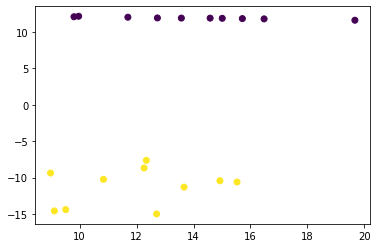

In [331]:
class SVM:
    def __init__(self, lr=0.1, n=10000):
        self._n_iter = n
        self._lr = lr
        self._weights = None
        self._intercept = None

    def fit(self, X, y):
        y = np.array([-1, 1])[y]
        mu = np.zeros(len(y))

        f = lambda a: dual(mu - self._lr * a * projection(y) @ grad(dual)(mu, X, y), X, y)
        a0 = minimize_scalar(f, bounds=(0, 200))

        grad_f = grad(f)

        for i in range(self._n_iter):
            grad_f_at_mu = grad_f(mu)
            mu_next = mu - self._lr * a0.x * projection(y) @ grad_f_at_mu

            mu = np.where(mu_next >= 0, mu_next, 0)

        self._weights = np.sum(mu[:, None] * y[:, None] * X, axis=0)
        self._intercept = - 1 - np.max(np.matmul(X, self._weights)[y == -1])

    def predict(self, X):
        return ((X @ self._weights + self._intercept) > 0) * 1

X, y = make_classification(class_sep=3, scale=4, n_classes=2, n_clusters_per_class=1, n_features=2,
                           n_informative=2, n_samples=20, n_redundant=0, random_state=18)
plt.scatter(X[:, 0], X[:, 1], c=y)

w:  [ 0.018731   -0.13091215]
b:  0.15100991169955513


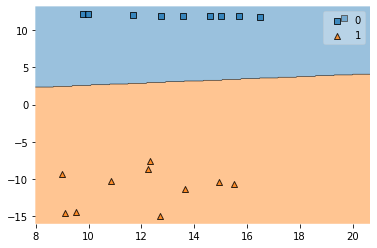

In [332]:
our_svm = SVM(lr=0.19, n=1000)
our_svm.fit(X, y)
plot_decision_regions(X, y, our_svm)
print("w: ", our_svm._weights)
print("b: ", our_svm._intercept)
pred = our_svm.predict(X)
plt.show()

w:  [[-0.00465771 -0.10221211]]
b:  [-0.27783075]


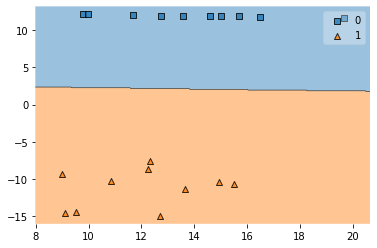

In [333]:
sklearn_svm = SVC(kernel="linear", max_iter=1000)
sklearn_svm.fit(X, y)
plot_decision_regions(X, y, sklearn_svm)
print("w: ", sklearn_svm._get_coef())
print("b: ", sklearn_svm._intercept_)
pred = sklearn_svm.predict(X)
plt.show()